# Flu Vaccination Modelling

### EDA

In [1]:
!ls

Brooke_EDA.ipynb      Project3_Brooke.ipynb


In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV, cross_validate

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [3]:
#pip install category_encoders

In [4]:
# Now import the category encoder tool
import category_encoders as ce

In [5]:
feat = pd.read_csv('../../Data/training_set_features.csv')
feat.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [6]:
feat.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [7]:
feat.shape

(26707, 36)

In [8]:
feat.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [9]:
# Importing target data
tar = pd.read_csv('../../Data/training_set_labels.csv')
tar.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [10]:
# Looking at value counts, for general info and to see which columns need frequency encoder
for c in feat.columns.drop('respondent_id'):
    print(feat[c].value_counts())
# hhs_geo_region, employment_industry, and employment occupation need frequency encoder

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64
1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64
0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64
1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64
0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64
1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64
0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64
0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64
1.0    18001
0.0     8578
Name: behavioral_touch_face, dtype: int64
0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64
0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64
0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64
0.0    23749
1.0     2138
Name: child_under_6_months, dtype: int64
0.0    23004
1.0     2899
Name: health_worker, dtype: int64
1.0    12697
0.0     1736
Name

In [11]:
feat.columns.drop('respondent_id')

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [12]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [13]:
# Merge features with target
df = feat.merge(tar, how='left', on='respondent_id')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [14]:
#Define our X and y
X = df.drop(columns = ['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'])
y = df['h1n1_vaccine']


# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
# Set up lists for columns requiring different treatment
num_cols = []
ohe_cols = []
freq_cols = []

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [16]:
print(num_cols)
print('*'*100)
print(ohe_cols)
print('*'*100)
print(freq_cols)

['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']
****************************************************************************************************
['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']
****************************************************************************************************
['hhs_geo_region', 'employment_industry', 'employment_occupation']


In [17]:
# Set up entries for the pipeline
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('minmaxscaler', MinMaxScaler())
])

In [18]:
# Group everything together with ColumnTransformer
# Package those pieces together using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])


In [19]:
# Fit the preprocessor with X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face', 'doct...
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq'

In [20]:
# Just out of curiosity, let's see what this looks like 
X_tr_transformed = preprocessor.transform(X_train)
X_tr_transformed.shape

(24036, 59)

In [21]:
# Make DataFrame of transformed values
pd.DataFrame(X_tr_transformed)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.420470,-0.424728,-0.227014,0.613447,-0.274131,0.460944,-0.743987,-0.712210,0.691409,-0.502911,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.638275,0.71249
1,0.420470,-0.424728,-0.227014,0.613447,-0.274131,0.460944,-0.743987,-0.712210,0.691409,-0.502911,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.542978,0.000000,0.71249
2,0.420470,1.197512,-0.227014,-1.630133,-0.274131,0.460944,1.344110,1.404081,-1.446321,-0.502911,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.353024,0.060577,0.00000
3,-1.779925,1.197512,-0.227014,-1.630133,-0.274131,0.460944,-0.743987,-0.712210,0.691409,-0.502911,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.560665,1.000000,1.00000
4,-1.779925,-2.046967,-0.227014,-1.630133,-0.274131,0.460944,-0.743987,-0.712210,-1.446321,-0.502911,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.559958,1.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24031,0.420470,-0.424728,-0.227014,-1.630133,-0.274131,0.460944,-0.743987,-0.712210,0.691409,-0.502911,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.625398,1.000000,1.00000
24032,-0.679728,-0.424728,-0.227014,-1.630133,-0.274131,0.460944,-0.743987,-0.712210,0.691409,-0.502911,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.353024,1.000000,1.00000
24033,0.420470,-0.424728,-0.227014,0.613447,-0.274131,-2.169459,-0.743987,-0.712210,0.691409,-0.502911,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.625398,0.638275,0.71249
24034,0.420470,-0.424728,-0.227014,0.613447,-0.274131,0.460944,-0.743987,-0.712210,0.691409,1.988425,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.560665,0.060577,0.71249


# kNN Models

In [31]:
# First baseline KNN model using X_train transformed by the pipeline
knn_base = KNeighborsClassifier()
knn_base.fit(X_tr_transformed, y_train)

KNeighborsClassifier()

In [32]:
# Predictions and precision scores for baseline kNN model
y_tr_hat = knn_base.predict(X_tr_transformed)
precision_score(y_train, y_tr_hat)

0.7291609729434272

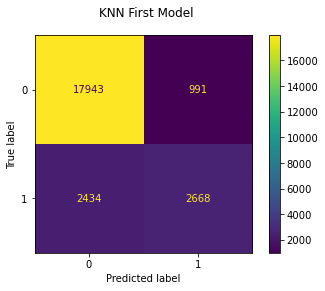

In [33]:
# Get confusion matrix
fig, ax = plt.subplots()

fig.suptitle("KNN First Model")

plot_confusion_matrix(estimator=knn_base, X=X_tr_transformed, y_true=y_train, ax=ax)

In [24]:
# Setting up pipeline to use in another baseline model
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                     

In [25]:
# Scoring
knn_pipe.score(X_train, y_train)

0.857505408553836

In [38]:
cross_val_score(knn_pipe, X_train, y_train)

array([0.81052413, 0.81360516, 0.81173289, 0.80840441, 0.80840441])

In [ ]:
confusion_matrix()

In [28]:
# Setting up Grid Search for KNN model
knn_grid = {'knn__n_neighbors': [3, 5, 7], 'knn__p': [1, 2, 3]}

knn_pipe_grid = GridSearchCV(estimator=knn_pipe, param_grid=knn_grid, cv=3)

In [29]:
# Fitting
knn_pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['h1n1_concern',
                                                                          'h1n1_knowledge',
                                                                          'behavioral_antiviral_meds',
                                                                          'behavioral_avoidance',
                     

In [30]:
knn_pipe_grid.best_params_

{'knn__n_neighbors': 7, 'knn__p': 1}

### KNN Model with best hyperparameters

In [36]:
# KNN model with 7 neighbors and manhattan formula
knn_pipe2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=7, p=1))
])
knn_pipe2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                     

In [37]:
# scoring the model with best hyperparameters
knn_pipe2.score(X_train, y_train)

0.8522632717590282

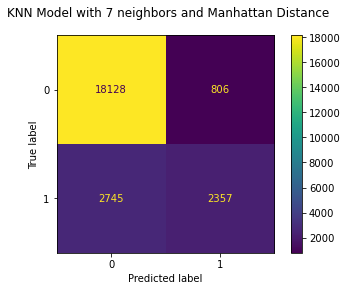

In [40]:
# 
fig, ax = plt.subplots()

fig.suptitle("KNN Model with 7 neighbors and Manhattan Distance")

plot_confusion_matrix(estimator=knn_pipe2, X=X_train, y_true=y_train, ax=ax)

In [42]:
# 
y_tr_predpipe2 = knn_pipe2.predict(X_train)
print(f'Precision Score: {precision_score(y_train, y_tr_predpipe2)}')

Precision Score: 0.7451786278849194


In [43]:
# f1score
print(f'F1 Score: {f1_score(y_train, y_tr_predpipe2)}')

F1 Score: 0.5703569267997581


In [47]:
confusion_matrix(y_train, y_tr_predpipe2)

array([[18128,   806],
       [ 2745,  2357]])

In [54]:
# KNN model with 7 neighbors and manhattan formula

def KNN_Results_train(knn_pipeline, X_train, y_train):
    
    knn_pipeline.fit(X_train, y_train)
    mean_accuracy = knn_pipeline.score(X_train, y_train)
    y_preds = knn_pipeline.predict(X_train)
    Precision_score = precision_score(y_train, y_preds)
    F1_score = f1_score(y_train, y_preds)
    print(f'Mean Accuracy Score: {mean_accuracy}')
    print(f'Precision Score: {Precision_score}')
    print(f'F1 Score: {F1_score}')
    return confusion_matrix(y_train, y_preds)


In [ ]:
KNN_Results_train(knn_pipe2, X_train, y_train)